# Machine Learning Classifiers

In [1]:
# iimport libraries
import os
import pickle
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.utils import np_utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    balanced_accuracy_score,
    confusion_matrix,
    f1_score,
    matthews_corrcoef,
)
from sklearn.metrics.classification import log_loss
from sklearn.model_selection import (
    StratifiedKFold,
    cross_val_predict,
    learning_curve,
    train_test_split,
)
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")

# import pre processed data
result = pd.read_pickle("/home/zhendi/pm/archive-pickles/result_non_split_91.pkl")
trainDf = pd.read_pickle("/home/zhendi/pm/archive-pickles/trainDf_91.pkl")

# split data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(
    trainDf, result.Class, test_size=0.2, random_state=5
)

# encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # int64
y_test = le.transform(y_test)
encoded_test_y = np_utils.to_categorical((le.inverse_transform(y_test)))


/home/zhendi/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Trained best models

In [2]:


filename = "/home/zhendi/pm/scripts/ML_model/pipe/svr_CV_best.sav"
with (open(filename, "rb")) as openfile:
    svr_CV_best = pickle.load(openfile)

filename = "/home/zhendi/pm/scripts/ML_model/pipe/logreg_CV_best.sav"
with (open(filename, "rb")) as openfile:
    logreg_CV_best = pickle.load(openfile)

filename = "/home/zhendi/pm/scripts/ML_model/pipe/knn_CV_best.sav"
with (open(filename, "rb")) as openfile:
    knn_CV_best = pickle.load(openfile)

filename = "/home/zhendi/pm/scripts/ML_model/pipe/random_forest_CV_best.sav"
with (open(filename, "rb")) as openfile:
    random_forest_CV_best = pickle.load(openfile)

filename = "/home/zhendi/pm/scripts/ML_model/pipe/Ada_Boost_CV_best.sav"
with (open(filename, "rb")) as openfile:
    Ada_Boost_CV_best = pickle.load(openfile)

filename = "/home/zhendi/pm/scripts/ML_model/pipe/xgb_clf_cv_best.sav"
with (open(filename, "rb")) as openfile:
    xgb_clf_cv_best = pickle.load(openfile)

filename = "/home/zhendi/pm/scripts/ML_model/pipe/mlp_GS_best.sav"
with (open(filename, "rb")) as openfile:
    mlp_GS_best = pickle.load(openfile)

filename = "/home/zhendi/pm/scripts/ML_model/pipe/Voting_ens.sav"
with (open(filename, "rb")) as openfile:
    Voting_ens = pickle.load(openfile)



## Functions for evaluation

In [3]:
def mea_metrics_calc(num, model, train, test, target, target_test):
    """ For the calculation and storage of accuracy and log loss """

    global mea_all

    ytrain = model.predict(train)
    yprobas = model.predict_proba(train)
    ytest = model.predict(test)
    yprobas_test = model.predict_proba(test)
    print("target = ", target[:5])
    print("ytrain = ", ytrain[:5])
    print("target_test =", target_test[:5])
    print("ytest =", ytest[:5])

    num_mea = 0
    for x in metrics_now:
        if x == 1:
            # log loss 
            mea_train = log_loss(target, yprobas)
            mea_test = log_loss(target_test, yprobas_test)
        elif x == 2:
            # accuracy 
            mea_train = round(balanced_accuracy_score(target, ytrain) * 100, 3)
            mea_test = round(balanced_accuracy_score(target_test, ytest) * 100, 3)
        elif x == 3:
            # f1 score
            mea_train = f1_score(target, ytrain, average = 'micro')
            mea_test = f1_score(target_test, ytest, average = 'micro')

        print("Measure of", metrics_all[x], "for train =", mea_train)
        print("Measure of", metrics_all[x], "for test =", mea_test)
        
        mea_all[num_mea].append(mea_train)  # train
        mea_all[num_mea + 1].append(mea_test)  # test
        num_mea += 2

    # return plot_confusion_matrix(model, target_test, ytest)


## Pre settings

In [4]:

kfold = StratifiedKFold(n_splits=5)
random_state = 0
metrics_all = {1: "Log_Loss", 2: "Accuracy", 3: 'F1_score'}
metrics_now = [1, 2, 3]
num_models = 8
mea_train = []
mea_test = []
mea_all = np.empty((len(metrics_now) * 2, 0)).tolist()


## Best parameters

In [5]:

print(svr_CV_best)

SVC(C=10, gamma=1, kernel='linear', probability=True, tol=0.0001)


In [6]:
print(logreg_CV_best)

LogisticRegression(C=0.001, multi_class='multinomial', solver='sag')


In [7]:
print(knn_CV_best)

KNeighborsClassifier(algorithm='brute', n_neighbors=6, weights='distance')


In [8]:
print(random_forest_CV_best)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=600)


In [9]:
print(Ada_Boost_CV_best)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=1500)


In [10]:
print(xgb_clf_cv_best)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [11]:
print(mlp_GS_best)

MLPClassifier(activation='tanh', alpha=10.0, hidden_layer_sizes=20,
              learning_rate='adaptive', max_iter=1400)


In [12]:
print(Voting_ens)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=0.001,
                                                 multi_class='multinomial',
                                                 solver='sag')),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=20,
                                                     n_estimators=600)),
                             ('knn',
                              KNeighborsClassifier(algorithm='brute',
                                                   n_neighbors=6,
                                                   weights='distance')),
                             ('svm',
                              SVC(C=10, gamma=1, kernel='linear',
                                  probability=True, tol=0.0001))],
                 n_jobs=-1, voting='soft')


## Metrics

In [13]:
# Calculate log loss and accuracy and plot confusion matrix
mea_metrics_calc(0, svr_CV_best, X_train, X_test, y_train, y_test)


target =  [4 6 6 5 5]
ytrain =  [4 6 6 5 5]
target_test = [8 0 6 6 1]
ytest = [8 0 1 2 1]
Measure of Log_Loss for train = 0.9630652105302457
Measure of Log_Loss for test = 1.2723774315053398
Measure of Accuracy for train = 100.0
Measure of Accuracy for test = 50.471
Measure of F1_score for train = 1.0
Measure of F1_score for test = 0.6030075187969924


In [14]:
mea_metrics_calc(1, logreg_CV_best, X_train, X_test, y_train, y_test)

target =  [4 6 6 5 5]
ytrain =  [4 6 6 5 5]
target_test = [8 0 6 6 1]
ytest = [8 0 6 2 4]
Measure of Log_Loss for train = 0.8927504043227856
Measure of Log_Loss for test = 1.1783622148615573
Measure of Accuracy for train = 56.987
Measure of Accuracy for test = 42.614
Measure of F1_score for train = 0.7036897590361446
Measure of F1_score for test = 0.5744360902255639


In [15]:
mea_metrics_calc(2, knn_CV_best, X_train, X_test, y_train, y_test)

target =  [4 6 6 5 5]
ytrain =  [4 6 6 5 5]
target_test = [8 0 6 6 1]
ytest = [8 0 1 2 4]
Measure of Log_Loss for train = 1.6931900436495596e-06
Measure of Log_Loss for test = 4.7294067512998295
Measure of Accuracy for train = 100.0
Measure of Accuracy for test = 48.371
Measure of F1_score for train = 1.0
Measure of F1_score for test = 0.6165413533834586


In [17]:
mea_metrics_calc(3, random_forest_CV_best, X_train, X_test, y_train, y_test)

target =  [4 6 6 5 5]
ytrain =  [4 6 6 5 5]
target_test = [8 0 6 6 1]
ytest = [8 0 1 2 1]
Measure of Log_Loss for train = 0.04815585160721226
Measure of Log_Loss for test = 1.3427500409138315
Measure of Accuracy for train = 99.227
Measure of Accuracy for test = 47.898
Measure of F1_score for train = 0.9958584337349398
Measure of F1_score for test = 0.6345864661654136


In [18]:
mea_metrics_calc(4, Ada_Boost_CV_best, X_train, X_test, y_train, y_test)

target =  [4 6 6 5 5]
ytrain =  [4 6 6 5 5]
target_test = [8 0 6 6 1]
ytest = [6 0 1 2 4]
Measure of Log_Loss for train = 2.180649615374459
Measure of Log_Loss for test = 2.184010729043763
Measure of Accuracy for train = 97.584
Measure of Accuracy for test = 47.918
Measure of F1_score for train = 0.9695030120481928
Measure of F1_score for test = 0.6481203007518797


In [19]:
mea_metrics_calc(5, xgb_clf_cv_best, X_train, X_test, y_train, y_test)

target =  [4 6 6 5 5]
ytrain =  [4 6 6 5 5]
target_test = [8 0 6 6 1]
ytest = [8 0 1 2 4]
Measure of Log_Loss for train = 0.4511847553679338
Measure of Log_Loss for test = 1.0002349960624723
Measure of Accuracy for train = 85.159
Measure of Accuracy for test = 50.711
Measure of F1_score for train = 0.8919427710843374
Measure of F1_score for test = 0.6511278195488722


In [20]:
mea_metrics_calc(6, mlp_GS_best, X_train, X_test, y_train, y_test)

target =  [4 6 6 5 5]
ytrain =  [4 6 6 5 5]
target_test = [8 0 6 6 1]
ytest = [8 0 6 6 4]
Measure of Log_Loss for train = 0.5911018185148617
Measure of Log_Loss for test = 1.0951192337255544
Measure of Accuracy for train = 63.189
Measure of Accuracy for test = 44.977
Measure of F1_score for train = 0.8249246987951807
Measure of F1_score for test = 0.6120300751879699


In [21]:
mea_metrics_calc(7, Voting_ens, X_train, X_test, y_train, y_test)

target =  [4 6 6 5 5]
ytrain =  [4 6 6 5 5]
target_test = [8 0 6 6 1]
ytest = [8 0 1 2 4]
Measure of Log_Loss for train = 0.3379347611563364
Measure of Log_Loss for test = 1.0132549249644007
Measure of Accuracy for train = 99.239
Measure of Accuracy for test = 48.656
Measure of F1_score for train = 0.9981174698795181
Measure of F1_score for test = 0.6586466165413534


In [22]:
# specify model names
models = pd.DataFrame(
    {
        "Model": [
            "SVM Classifier",
            "Logistic Regression Classifier",
            "kNN Classifier",
            "Random Forest Classifier",
            "AdaBoost Classifier",
            "XGBoost Classifier",
            "MLP Classifier",
            "Voting Classifier",
        ]
    }
)




In [23]:
# generate performance tables
pd.options.display.float_format = "{:,.3f}".format
for x in metrics_now:
    xs = metrics_all[x]
    models[xs + "_train"] = mea_all[(x - 1) * 2]
    models[xs + "_test"] = mea_all[(x - 1) * 2 + 1]
    if xs == "Accuracy":
        models[xs + "_diff"] = models[xs + "_train"] - models[xs + "_test"]
# # store the results
# filename = "/home/zhen.di/pm/text-ml-classification/scripts/ML_model/models8_ba.pkl"
# models.to_pickle(filename)


In [24]:
# generate performance table in order
print("In the descending order of F1 scores on testing data")
ms = metrics_all[metrics_now[2]]  # the F1 score
models.sort_values(by=[(ms + "_test"), (ms + "_train")], ascending=False)

In the descending order of F1 scores on testing data


,Model,Log_Loss_train,Log_Loss_test,Accuracy_train,Accuracy_test,Accuracy_diff,F1_score_train,F1_score_test
7,Voting Classifier,0.338,1.013,99.239,48.656,50.583,0.998,0.659
5,XGBoost Classifier,0.451,1.000,85.159,50.711,34.448,0.892,0.651
4,AdaBoost Classifier,2.181,2.184,97.584,47.918,49.666,0.970,0.648
3,Random Forest Classifier,0.048,1.343,99.227,47.898,51.329,0.996,0.635
2,kNN Classifier,0.000,4.729,100.000,48.371,51.629,1.000,0.617
6,MLP Classifier,0.591,1.095,63.189,44.977,18.212,0.825,0.612
0,SVM Classifier,0.963,1.272,100.000,50.471,49.529,1.000,0.603
1,Logistic Regression Classifier,0.893,1.178,56.987,42.614,14.373,0.704,0.574


In [25]:
# generate performance table in order
print("In the descending order of balanced accuracy on testing data")
ms = metrics_all[metrics_now[1]]  # the accuracy
models.sort_values(by=[(ms + "_test"), (ms + "_train")], ascending=False)
# # store the results
# filename = (
#     "/home/zhen.di/pm/text-ml-classification/scripts/ML_model/models8_s_acc_ba.pkl"
# )
# models.to_pickle(filename)


In the descending order of balanced accuracy on testing data


,Model,Log_Loss_train,Log_Loss_test,Accuracy_train,Accuracy_test,Accuracy_diff,F1_score_train,F1_score_test
5,XGBoost Classifier,0.451,1.000,85.159,50.711,34.448,0.892,0.651
0,SVM Classifier,0.963,1.272,100.000,50.471,49.529,1.000,0.603
7,Voting Classifier,0.338,1.013,99.239,48.656,50.583,0.998,0.659
2,kNN Classifier,0.000,4.729,100.000,48.371,51.629,1.000,0.617
4,AdaBoost Classifier,2.181,2.184,97.584,47.918,49.666,0.970,0.648
3,Random Forest Classifier,0.048,1.343,99.227,47.898,51.329,0.996,0.635
6,MLP Classifier,0.591,1.095,63.189,44.977,18.212,0.825,0.612
1,Logistic Regression Classifier,0.893,1.178,56.987,42.614,14.373,0.704,0.574


In [26]:
# generate performance table in order
print("In the ascending order of log loss on testing data")
ms = metrics_all[metrics_now[0]]  # the log loss
models.sort_values(by=[(ms + "_test"), (ms + "_train")], ascending=True)
# # store the results
# filename = (
#     "/home/zhen.di/pm/text-ml-classification/scripts/ML_model/models8_s_logloss_ba.pkl"
# )
# models.to_pickle(filename)

In the ascending order of log loss on testing data


,Model,Log_Loss_train,Log_Loss_test,Accuracy_train,Accuracy_test,Accuracy_diff,F1_score_train,F1_score_test
5,XGBoost Classifier,0.451,1.000,85.159,50.711,34.448,0.892,0.651
7,Voting Classifier,0.338,1.013,99.239,48.656,50.583,0.998,0.659
6,MLP Classifier,0.591,1.095,63.189,44.977,18.212,0.825,0.612
1,Logistic Regression Classifier,0.893,1.178,56.987,42.614,14.373,0.704,0.574
0,SVM Classifier,0.963,1.272,100.000,50.471,49.529,1.000,0.603
3,Random Forest Classifier,0.048,1.343,99.227,47.898,51.329,0.996,0.635
4,AdaBoost Classifier,2.181,2.184,97.584,47.918,49.666,0.970,0.648
2,kNN Classifier,0.000,4.729,100.000,48.371,51.629,1.000,0.617


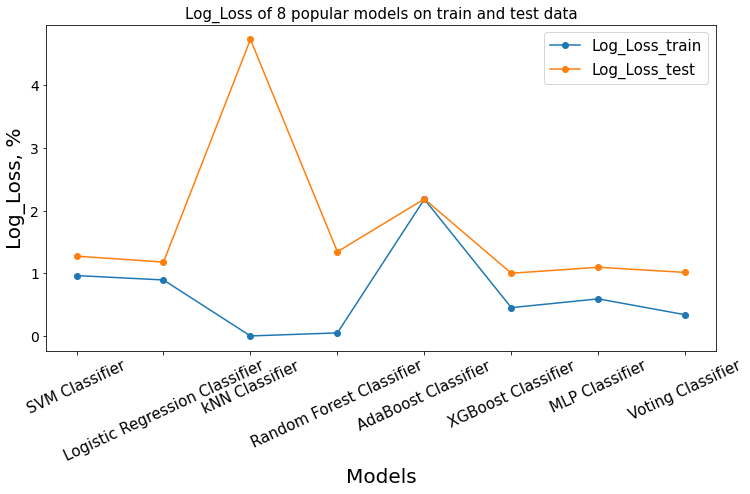

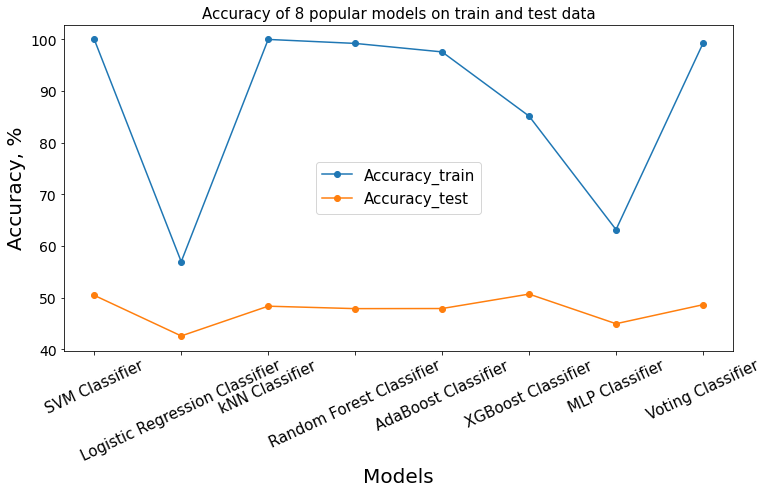

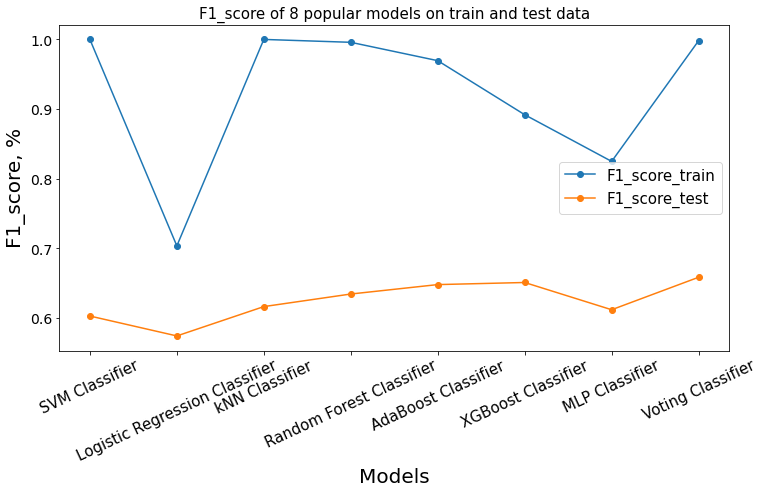

In [27]:
# plot accuracy and log loss for all models
pd.options.display.float_format = "{:,.3f}".format
for x in metrics_now:
    # plot
    xs = metrics_all[x]
    xs_train = metrics_all[x] + "_train"
    xs_test = metrics_all[x] + "_test"
    fig = plt.figure(figsize=[12, 6])

    xx = models["Model"]
    plt.tick_params(labelsize=14)
    plt.plot(xx, models[xs_train], marker="o", label=xs_train)
    plt.plot(xx, models[xs_test], marker="o", label=xs_test)
    plt.legend(prop={"size": 15})
    plt.title(
        str(xs) + " of " + str(num_models) + " popular models on train and test data",
        fontsize=15,
    )
    plt.xlabel("Models", fontsize=20)
    plt.ylabel(xs + ", %", fontsize=20)
    plt.xticks(xx, rotation=25, fontsize=15)
    # store the plots
    Im_dir_path = "/home/zhendi/pm/scripts/image/"
    # clean_name = re.split('[()]', str(estimator))[0]
    Name_Formatted = ("%s" % metrics_all[x]) + "_8models_ba.png"
    file_path = os.path.join(Im_dir_path, Name_Formatted)
    fig.savefig(file_path)

    plt.show()